# 02. Neural Network Classification

Classification is a problem of predicting wether something is one thing of another (there can be multiple things as the options)

- Book version of this notebook -> https://www.learnpytorch.io/02_pytorch_classification/
- All other resources -> https://github.com/mrdbourke/pytorch-deep-learning
- Stuck? Ask question at -> https://github.com/mrdbourke/pytorch-deep-learning/discussions


## 1. Make Classification data and get it ready

In [1]:
from time import process_time_ns

from numpy.testing.print_coercion_tables import print_new_cast_table
from sklearn.datasets import make_circles
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples=n_samples,
                    random_state=42,
                    noise=0.03)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X : \n{X[:5]}")
print(f"First 5 samples of y : \n{y[:5]}")

First 5 samples of X : 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
[1 1 1 1 0]


In [4]:
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


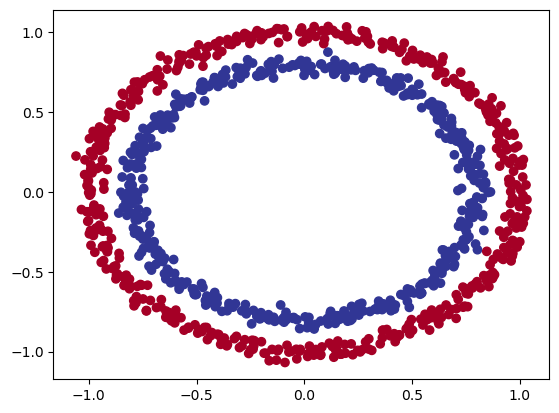

In [5]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**Notes** : The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
[X]

[array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]])]

In [8]:
# View the first example of features and examples
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of x : {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of x : {X_sample.shape} and the same for y : {y_sample.shape}")

Values for one sample of x : [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of x : (2,) and the same for y : ()


### 1.2 Turn data into tensors and create tts

In [9]:
import torch
torch.__version__

'2.5.1+cu124'

In [10]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
X.dtype, y.dtype, type(X)

(torch.float32, torch.float32, torch.Tensor)

In [12]:
# Split data into training and tests sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Lets' build a model to classify out blue and red dots

To do so, we want to:
1. Setup device agonotic code so our code will run on an accelerator (GPU) if theres is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [14]:
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


Now we've setup device agnostic code, let's create a model that :

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [15]:
y[:5]

tensor([1., 1., 1., 1., 0.])

In [16]:
# 1. construct
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. create 2 nn.Linear layes that capable of handling the shapes of our data
        self.layer1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        self.layer2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from prevvious layer and outputs a single feature (same shape as y)

    # 3.define a forward() me
    def forward(self, x):
        return self.layer2(self.layer1(x)) # x -> layer 1 -> layer 2 -> outout

# 4. instantiate an instance of our model class and send it into target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# let's replicate the model abouve using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

In [19]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1753, -0.3295],
                      [ 0.3803, -0.1697],
                      [ 0.6430,  0.2005],
                      [-0.1389, -0.0956],
                      [ 0.2355, -0.6632]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0816,  0.6724,  0.5711, -0.5434,  0.1560], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4403, -0.1989,  0.0070, -0.2936,  0.1771]], device='cuda:0')),
             ('1.bias', tensor([0.0145], device='cuda:0'))])

In [21]:
# make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape : {X_test.shape}")
print(f"\nFirst 10 predictions :\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels :\n{y_test[:10]}")

Length of predictions : 200, Shape : torch.Size([200, 1])
Length of test samples : 200, Shape : torch.Size([200, 2])

First 10 predictions :
tensor([[0.1366],
        [0.1964],
        [0.0170],
        [0.1704],
        [0.0758],
        [0.1118],
        [0.2336],
        [0.2139],
        [0.0147],
        [0.2011]], device='cuda:0')

First 10 labels :
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [22]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer whould u use?

Again.. this is problem specific

For example for regression you  might want MAE or MSE

For classfication you might want binary cross entropy or categorical CE (CE).

As a reminder, the loss function measssures how *wrong* your models predictions are

And form optimizers, 2 of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* for some common choices of loss functions and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer
* for the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on that BCE us, check out this article - https://medium.com/towards-data-science/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a definition on what a logit is in deep learning - -https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow
* For different optimizers see `torch.optim`

In [23]:
# setup the loss function
# loss_fn1 = nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [24]:
# calculate accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred)*100
    return acc

## 3. Train model

To train our model, we're going to need build a training loop with the following steps:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. loss backward (backprop)
5. opt step(grad des)

### 3.1 Going from raw logits ->  pred's probabilities -> preds labels

Out model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to *prediction labels** by either rounding them or taking the `argmax()`

In [25]:
# View the first 5 outputs of theforward pass of the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
    y_logits2 = model_0(X_test.to(device))
print(y_logits)

tensor([[0.1366],
        [0.1964],
        [0.0170],
        [0.1704],
        [0.0758]], device='cuda:0')


In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
# use the sigmoid activation function on our model logits to turn them into preds probabilities
y_pred_probs  = torch.sigmoid(y_logits)
print(y_pred_probs)

tensor([[0.5341],
        [0.5490],
        [0.5042],
        [0.5425],
        [0.5189]], device='cuda:0')


For our pred probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [28]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for quality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
print(y_logits2.shape)
print(y_train.shape)
print(X_train.squeeze().shape)

torch.Size([200, 1])
torch.Size([800])
torch.Size([800, 2])


In [31]:
print(X_train[:10])

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994],
        [-0.8837, -0.4678],
        [-0.3836,  0.6987],
        [ 0.6047,  0.5163],
        [-0.5869,  0.7804],
        [ 0.8833, -0.5178]])


### 3.2 Building a training and testing loop

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    model_0.train()
    #training

    # 1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. opt zero grad
    optimizer.zero_grad()

    #l 4. loss backward (backprop)
    loss.backward()

    # 5. optimizer step (grad des)
    optimizer.step()

    # testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        # forward pass

        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. calculate the tess loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    #print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch : {epoch}, Loss : {loss:.4f}, Accuracy : {acc:.4f} | Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.4f}")


Epoch : 0, Loss : 0.6947, Accuracy : 59.0000 | Test Loss : 0.6982 | Test Accuracy : 55.5000
Epoch : 10, Loss : 0.6935, Accuracy : 52.7500 | Test Loss : 0.6968 | Test Accuracy : 47.5000
Epoch : 20, Loss : 0.6932, Accuracy : 52.0000 | Test Loss : 0.6962 | Test Accuracy : 48.0000
Epoch : 30, Loss : 0.6931, Accuracy : 52.2500 | Test Loss : 0.6959 | Test Accuracy : 45.5000
Epoch : 40, Loss : 0.6930, Accuracy : 51.5000 | Test Loss : 0.6958 | Test Accuracy : 46.0000
Epoch : 50, Loss : 0.6930, Accuracy : 51.5000 | Test Loss : 0.6957 | Test Accuracy : 46.0000
Epoch : 60, Loss : 0.6930, Accuracy : 51.6250 | Test Loss : 0.6956 | Test Accuracy : 45.5000
Epoch : 70, Loss : 0.6930, Accuracy : 51.0000 | Test Loss : 0.6955 | Test Accuracy : 45.5000
Epoch : 80, Loss : 0.6930, Accuracy : 51.0000 | Test Loss : 0.6954 | Test Accuracy : 45.5000
Epoch : 90, Loss : 0.6930, Accuracy : 51.0000 | Test Loss : 0.6953 | Test Accuracy : 45.5000


## 4. Make predictions and evaluate the model
]
From the metrics it looks like out model isn't learning anyhthing...

So to inspect it let's make some predictions and make them visual!

In other words, "visualize, visualize, visualize!"

To do so, we're going to import a function `plot_decision_boundary() - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

raw - https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py


In [36]:
import requests
import numpy as np
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
    print("Helper functions already exists, skipping download")
else:
    print("Downloading helper functions")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("../Python-files/helper_functions.py", "wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

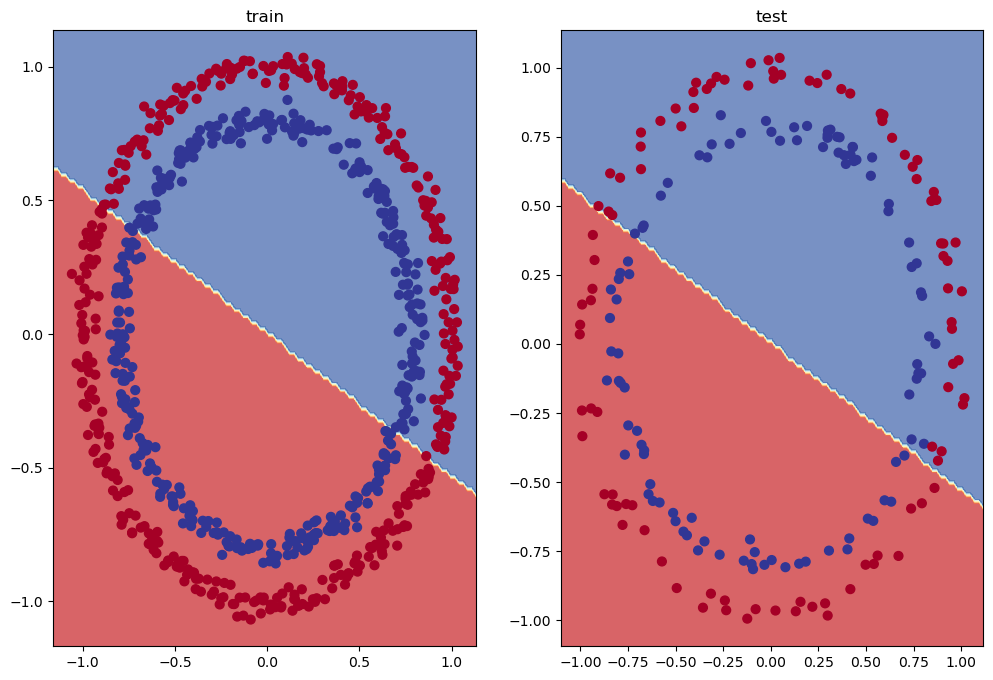

In [37]:
# plot decision boundary of the model
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)

plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)